In [1]:
import numpy as np
import pandas as pd

In [2]:
header = ['user_id','item_id','rating','timestamp']

In [7]:
train_data = pd.read_csv('Data/ml-1m.train.rating',sep='\t',names=header)
test_data = pd.read_csv('Data/ml-1m.test.rating',sep='\t',names=header)

In [8]:
train_data

,user_id,item_id,rating,timestamp
0,0,32,4,978824330
1,0,34,4,978824330
2,0,4,5,978824291
3,0,35,4,978824291
4,0,30,4,978824291
5,0,29,3,978824268
6,0,33,4,978824268
7,0,40,5,978824268
8,0,10,5,978824268
9,0,16,3,978824268


In [9]:
    n_users = train_data.user_id.unique().shape[0]
    n_items = train_data.item_id.unique().shape[0]
    print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 6040 | Number of movies = 3704


In [12]:
#create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users+1, n_items+1))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [23]:
#calculate cosine similarlity

In [13]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [14]:
user_similarity

array([[0.        , 0.84666855, 0.82480581, ..., 0.78084478, 1.        ,
        0.90209894],
       [0.84666855, 0.        , 0.84406979, ..., 0.86532289, 1.        ,
        0.87657542],
       [0.82480581, 0.84406979, 0.        , ..., 0.85889381, 1.        ,
        0.86294867],
       ...,
       [0.78084478, 0.86532289, 0.85889381, ..., 0.        , 1.        ,
        0.86439977],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.90209894, 0.87657542, 0.86294867, ..., 0.86439977, 1.        ,
        0.        ]])

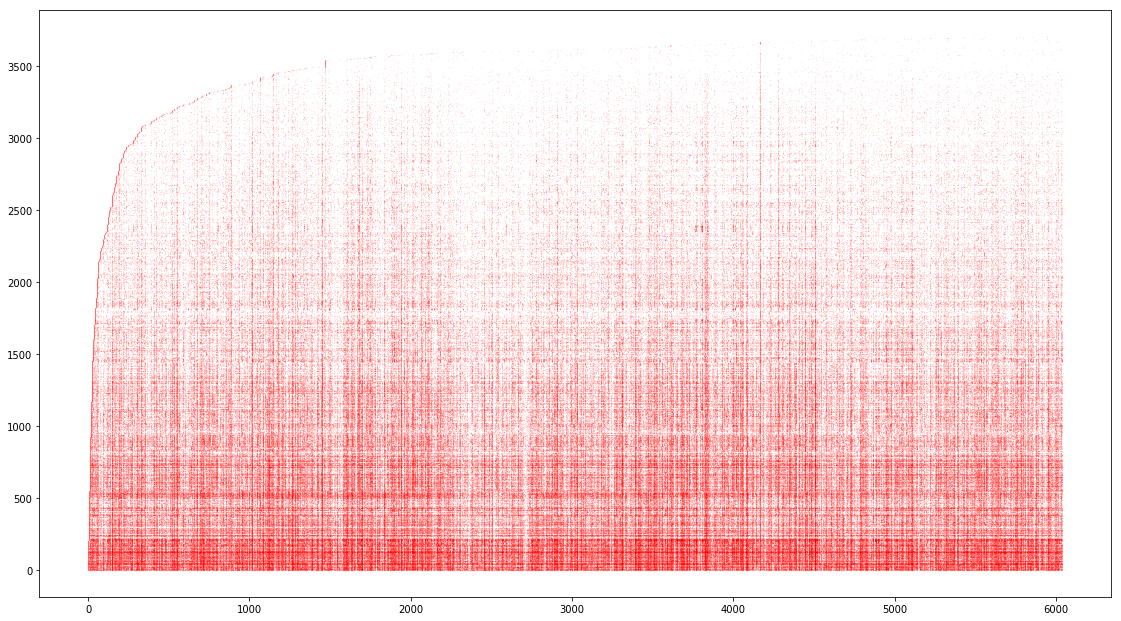

the percentage of non-value: 4 %.


In [22]:
import matplotlib.pyplot as plt
tempRow,tempColumn,value=[],[],[]
NUMBER=0
with open(file='Data/ml-1m.train.rating',mode='r',encoding='utf-8') as f:
    for line in f.readlines():
        line = line.strip('\r\n')
        user, movie, rating, _ = line.split()
        tempRow.append(int(user))
        tempColumn.append(int(movie))
        value.append(int(rating))
        NUMBER+=1
rows = np.array(tempRow)
columns = np.array(tempColumn)
value = np.array(value)
plt.figure(figsize=(19.20,10.80))
plt.scatter(rows,columns,s=0.001,c='r')
plt.show()
print("the percentage of non-value:",round(NUMBER/(int(n_users)*int(n_items))*100),"%.")

# predict item-based and user-based 

![algor1.png](attachment:algor1.png)

In [24]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [25]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [26]:
item_prediction

array([[0.11668155, 0.11133186, 0.10921558, ..., 0.12763513, 0.12810593,
        0.10155014],
       [0.04568075, 0.04559705, 0.04390685, ..., 0.05260618, 0.05220773,
        0.04073903],
       [0.01934082, 0.01884068, 0.01859975, ..., 0.02270005, 0.02237419,
        0.0160228 ],
       ...,
       [0.30330338, 0.29022793, 0.29428319, ..., 0.32905457, 0.32800964,
        0.26492678],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04730389, 0.0464301 , 0.04787719, ..., 0.05860704, 0.05790745,
        0.04552355]])

# evaluate

In [27]:
from sklearn.metrics import mean_squared_error
def rmse(prediction,ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return np.sqrt(mean_squared_error(prediction,ground_truth))

In [28]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.3509265875555165
Item-based CF RMSE: 3.6720147659697266


# Model-based collaborative filtering(SVD)

In [29]:
sparsity=round(1.0-len(df)/float(n_users*n_items),3)

In [31]:
print('The sparsity level of ml-1m is ' +  str(sparsity*100) + '%')

The sparsity level of ml-1m is 95.6%


$R=M*N$

Formula:$R=USV^T$

$U:M*M$

$S:M*N$

$V:N*N$

In [32]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds
#get SVD components from train matrix. choose k.
def mySvd(k=20):
    U,S,VT = svds(train_data_matrix,k)
    S_diag = np.diag(S)
    X_pred = np.dot(np.dot(U,S_diag),VT)
    return X_pred

In [70]:
print('User-based CF MSE:'+str(rmse(mySvd(50),test_data_matrix)))

User-based CF MSE:3.1430356759498035


In [55]:
#test
import datetime
Kend=100
myTime=[]
selectK = [i for i in range(1,Kend)]
MyMSE=[]
for i in range(1,Kend):
    startTime =datetime.datetime.now()
    res = mySvd(i)
    endTime = datetime.datetime.now()-startTime
    myTime.append(endTime)
    MyMSE.append(rmse(res,test_data_matrix))
    if i%5==0:
        print("processing ",i,"%")    

processing  5 %
processing  10 %
processing  15 %
processing  20 %
processing  25 %
processing  30 %
processing  35 %
processing  40 %
processing  45 %
processing  50 %
processing  55 %
processing  60 %
processing  65 %
processing  70 %
processing  75 %
processing  80 %
processing  85 %
processing  90 %
processing  95 %


In [56]:
tempTime = myTime

In [57]:
for i in tempTime:
    print(i.total_seconds())

1.454949
2.226087
1.428663
1.600659
1.97937
2.170548
1.979907
1.916599
2.031548
1.984361
2.125685
2.441126
2.296006
2.491937
2.716039
2.620136
2.559816
2.714792
2.914341
2.896515
3.761921
2.890683
3.146427
3.426895
3.196612
3.412405
3.427369
3.539748
3.664681
3.746676
3.78318
3.895966
4.464401
4.807917
4.227404
4.7019
4.540853
4.60473
4.73558
4.974473
4.899655
5.271998
5.268211
8.381704
5.711844
6.021245
5.948364
5.707585
5.992073
6.065427
6.206032
6.22165
6.357245
6.662374
6.755891
6.976242
7.076371
7.175335
7.314957
7.348342
7.693097
7.735773
7.625998
7.964014
7.890114
7.975384
8.23372
8.183621
8.382374
8.489578
8.844342
8.76538
8.599889
9.247408
8.991337
9.48462
9.491296
9.499169
10.042223
9.83199
13.28202
14.402422
13.282214
12.686159
11.51687
10.94876
11.036305
10.896387
11.425586
11.404165
11.831615
13.055666
13.356428
15.082644
15.611679
12.530546
13.428845
14.751132
13.805626


In [60]:
temp = [i.total_seconds() for i in tempTime]

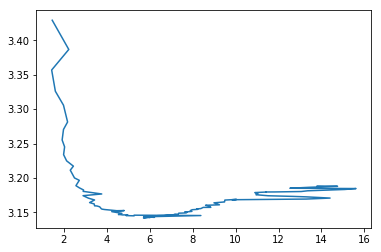

In [68]:
plt.plot(temp,MyMSE)

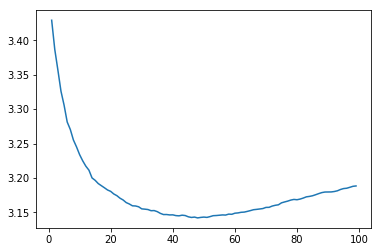

In [69]:
plt.plot(selectK,MyMSE)